## Python Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() # set plot style

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.shape

(891, 15)

In [5]:
data = titanic[['pclass', 'sex', 'age', 'survived']]
data.loc[:,'sex'] = data.loc[:,'sex'].map({'male':0, 'female':1}) # Convert strings to numbers
data.fillna(0, inplace=True) # Deal with missing values
data.head() 

,pclass,sex,age,survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [6]:
data.shape

(891, 4)

In [7]:
X = data.iloc[:,:-1].values.T
X[:,:10] # Show the data of the first 10 people

array([[ 3.,  1.,  3.,  1.,  3.,  3.,  1.,  3.,  3.,  2.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.],
       [22., 38., 26., 35., 35.,  0., 54.,  2., 27., 14.]])

In [8]:
y = data.iloc[:,-1].values.T
y[:10] # Show the data of the first 10 people

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

### Is 7th person alive?
 - (3rd class 2 years old  baby boy,  couldn’t make it)

In [9]:
# ith observation
i = 7
X[:,i]

array([3., 0., 2.])

In [10]:
# is he (male == 0) alive?
y[i]

0

## Sklearn Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic regression requires transpose of our data
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.33, random_state=42)

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train) # Train on train data
y_pred = lr.predict(X_test) # Predict on test data

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, lr.predict(X_test))))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[151  24]
 [ 36  84]]
Accuracy on Test Data:0.8


In [12]:
acc = (151 + 84) / (151 + 84 + 24 + 36)
print('Accuracy on Test Data:{:.2}'.format(acc))

Accuracy on Test Data:0.8


In [13]:
FirstClassBoys = np.array([[1., 0., 1],
                       [1., 0., 5],
                       [1., 0., 10],
                       [1., 0., 15],
                       [1., 0., 20],
                       [1., 0., 25],
                       [1., 0., 30],
                       [1., 0., 35],
                       [1., 0., 40],
                       [1., 0., 45],
                       [1., 0., 50],
                       [1., 0., 55],
                       [1., 0., 60],
                      ])

lr.predict(FirstClassBoys)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
FirstClassGirls = FirstClassBoys.copy()
FirstClassGirls[:,1] = 1
FirstClassGirls

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  5.],
       [ 1.,  1., 10.],
       [ 1.,  1., 15.],
       [ 1.,  1., 20.],
       [ 1.,  1., 25.],
       [ 1.,  1., 30.],
       [ 1.,  1., 35.],
       [ 1.,  1., 40.],
       [ 1.,  1., 45.],
       [ 1.,  1., 50.],
       [ 1.,  1., 55.],
       [ 1.,  1., 60.]])

In [15]:
lr.predict(FirstClassGirls)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
lr.coef_

array([[-0.87296107,  2.38758481, -0.00727172]])

Text(0.5, 1.0, 'Survival Chance')

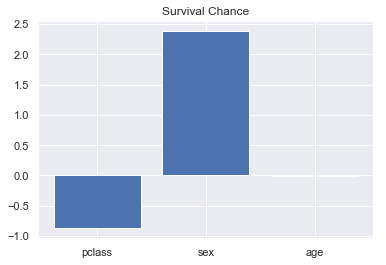

In [17]:
plt.bar(['pclass', 'sex', 'age'], lr.coef_[0])
plt.title('Survival Chance')

# Sigmoid Function

Returns a probability of getting $y = 1$ for given $x$ value
$$
P( y =1 | x) = \sigma(wx+b) = 
\sigma(z) = \frac{1}{1 + e^{-z}} \in [0,1]
$$

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

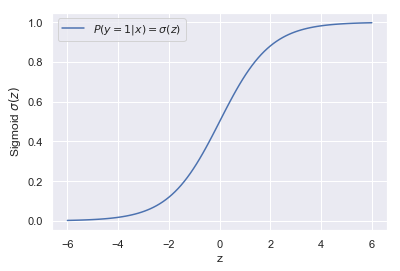

In [19]:
z = np.linspace(-6,6,100)
plt.plot(z,sigmoid(z), label = '$P( y =1 | x) =  \sigma(z)$')
plt.xlabel('z'); plt.ylabel('Sigmoid $\sigma (z)$'); plt.legend()

## Derivative of Sigmoid Function

$\hspace{8cm}$ __Sigmoid Function__

$$
\sigma(z) = \frac{1}{1 + e^{-z}} \in [0,1]
$$

$\hspace{8cm}$ __Derivative of Sigmoid Function__

\begin{equation} \label{eq1}
\begin{split}
\frac{\partial \sigma(z)}{\partial z} & = \frac{-1}{(1 + e^{-z})^2} \frac{\partial (1 + e^{-z})}{\partial z} \\
 & = \frac{-1}{(1 + e^{-z})^2} (0 - e^{-z}) \\
 & = \frac{1}{1 + e^{-z}} \frac{e^{-z}}{1 + e^{-z}}  \\
 & = \frac{1}{1 + e^{-z}} (1 - \frac{1}{1 + e^{-z}})  \\
 & = \sigma(z) (1 - \sigma(z))
\end{split}
\end{equation}

$\hspace{8cm}$  __Model__

$$
a^{(i)} = \sigma(z^{(i)}) = \sigma(wx^{(i)} + b)
$$

$\hspace{8cm}$  __Derivative wrt w__

\begin{equation} \label{eq2}
\begin{split}
\frac{\partial a^{(i)}}{\partial w} & = \frac{\partial \sigma(z^{(i)})}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial w} 
\\
 & = \sigma(z^{(i)}) (1 - \sigma(z^{(i)}) \frac{\partial z^{(i)}}{\partial w} \\
 & = a^{(i)} (1 - a^{(i)}) \frac{\partial wx^{(i)} + b}{\partial w} \\
 & =  a^{(i)} (1 - a^{(i)}) x^{(i)} 
\end{split}
\end{equation}


In [20]:
z = 0
sigmoid(z) * (1 - sigmoid(z))

0.25

## Maximum Likelihood

Goal
 - When $y^{(i)} = 1$, we want $a^{(i)} \rightarrow 1$ _(Max $a^{(i)}$)_
 - When $y^{(i)} = 0$, we want $a^{(i)} \rightarrow 0$ _(Max $1 - a^{(i)}$)_
 
In condensed notation _($y^{(i)} = 1 \Rightarrow \text{Max} \; a^{(i)}$ and $y^{(i)} = 0 \Rightarrow \text{Max} \; 1 - a^{(i)}$ )_

 - Max $a^{(i)^{y^{(i)}}} (1 - a^{(i)})^{1 - y^{(i)}}$

 
For all instances

$$
\text{Max} \;\; {\displaystyle \prod_{i=1}^{n} a^{(i)^{y^{(i)}}} (1 - a^{(i)})^{1 - y^{(i)}}}
$$

## Loss Function
Convert this maximisation problem to minimisation problem, 
 - by taking logarithm and negation
 - We also divide by $n$

$$
\text{Min} \;\; {\displaystyle \frac{-1}{n} \sum_{i=1}^{n} y^{(i)} \log a^{(i)}  + (1 - y^{(i)}) \log (1 - a^{(i)})}
$$

In [21]:
def cross_entropy_loss(a,y):
    a[np.where(a == 1)] = 0.99
    a[np.where(a == 0)] = 0.01
    return - (y* np.log(a) + (1 - y) * (np.log(1 - a)))

Text(0, 0.5, '$a^y (1-a)^{(1-y)}$')

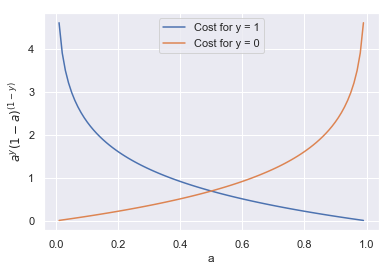

In [22]:
a = np.linspace(0,1, 100)
plt.plot(a, cross_entropy_loss(a,y = 1), label = 'Cost for y = 1')
plt.plot(a, cross_entropy_loss(a,y = 0), label = 'Cost for y = 0')
plt.legend(); plt.xlabel('a'); plt.ylabel('$a^y (1-a)^{(1-y)}$')

In [23]:
yy = np.array([1,1,1,1])

a1 = np.array([0,0,0,1], dtype = float)
print("{:.2f}".format(np.mean(cross_entropy_loss(a1,yy))))

a2 = np.array([0,0,1,1], dtype = float)
print("{:.2f}".format(np.mean(cross_entropy_loss(a2,yy))))

a3 = np.array([0,1,1,1], dtype = float)
print("{:.2f}".format(np.mean(cross_entropy_loss(a3,yy))))

a4 = np.array([1,1,1,1], dtype = float)

print("{:.2f}".format(np.mean(cross_entropy_loss(a4,yy))))

3.46
2.31
1.16
0.01


## Derivative of Cost Function

Model

$$
a^{(i)} = \sigma(wx^{(i)} + b)
$$

Cost Function
$$
J (w,b) = {\displaystyle \frac{-1}{n} \sum_{i=1}^{n} y^{(i)} \log a^{(i)}  + (1 - y^{(i)}) \log (1 - a^{(i)})}
$$

Derivative of Cost Function
\begin{equation} \label{eq1}
\begin{split}
\frac{\partial J (w,b)}{\partial w} & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} y^{(i)} \frac{\partial \log a^{(i)}}{\partial w}  + 
(1 - y^{(i)}) \frac{\partial \log (1 - a^{(i)})}{\partial w}}\\
 & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} \frac{y^{(i)}}{a^{(i)}} 
\frac{\partial a^{(i)}}{\partial w}  + 
\frac{1 - y^{(i)}}{1 - a^{(i)}}
\frac{\partial(1 - a^{(i)})}{\partial w}}\\
 & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} \frac{y^{(i)}}{a^{(i)}} 
\frac{\partial a^{(i)}}{\partial w}  -
\frac{1 - y^{(i)}}{1 - a^{(i)}}
\frac{\partial(a^{(i)})}{\partial w}}\\
 & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} \frac{y^{(i)}}{a^{(i)}} 
a^{(i)} (1 - a^{(i)}) x^{(i)}  -
\frac{1 - y^{(i)}}{1 - a^{(i)}}
a^{(i)} (1 - a^{(i)}) x^{(i)}}
\\
 & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} y^{(i)}(1 - a^{(i)}) x^{(i)} -
(1 - y^{(i)})
a^{(i)} 
x^{(i)}}\\
 & = {\displaystyle \frac{-1}{n} 
\sum_{i=1}^{n} y^{(i)}(1 - a^{(i)}) x^{(i)} -
(1 - y^{(i)})
a^{(i)} 
x^{(i)}}\\
 & = {\displaystyle \frac{1}{n} 
\sum_{i=1}^{n} 
(1 - y^{(i)}) a^{(i)} x^{(i)}} -
y^{(i)}(1 - a^{(i)}) x^{(i)} \\
 & = {\displaystyle \frac{1}{n} 
\sum_{i=1}^{n} 
(a^{(i)} - y^{(i)})  x^{(i)}}
\\
\end{split}
\end{equation}

This is a dot product
`1./n * np.dot(a-y,x.T)`

To calculate $\frac{\partial J (w,b)}{\partial b}$, you can think $b = w$ and $x = 1$ then $\frac{\partial J (w,b)}{\partial b} = {\displaystyle \frac{1}{n} 
\sum_{i=1}^{n} 
(a^{(i)} - y^{(i)})}$ which is `1./n * np.sum(a-y)`

# Logistic Regression


In [24]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iteration = 1000):
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # d: number of features
        self.n = self.X.shape[1] # n: number of observations
        
        self.alpha = alpha
        self.iteration = iteration
        
        self.w  = np.random.rand(1, self.d) # Random initial w values 
        self.b = np.random.rand()  # Random initial b value
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, a, y):
        return - (y* np.log(a) + (1 - y) * (np.log(1 - a)))

    def fit(self):
        self.Js = [] # Store Cost value for each 100th iteration 

        for i in range(self.iteration):
            # Forward Propagation
            z = np.dot(self.w, self.X) + self.b # Model z = wX +b
            a = self.sigmoid(z)                 # Model a = sigmoid(z)
            # Backward Propagation
            dw = (1 / self.n) * np.dot((a-self.y),self.X.T)
            db = (1 / self.n) * np.sum(a-self.y)
            # Gradient Descent 
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db
            
            if i%100: # Store Cost value for each 100th iteration 
                cost = self.cross_entropy_loss(a, self.y)
                self.Js.append(np.sum(cost))
                
    def predict(self, X_test):
        z = np.dot(self.w, X_test) + self.b
        a = self.sigmoid(z)
        
        return 1 * (a > 0.5)

## Train the Model

In [25]:
cls = Classo(X, y , alpha = 13, iteration = 10000)
cls.fit()

In [26]:
print("Model parameters: ")
print("\tw = {}".format(cls.w))
print("\tb = {}".format(cls.b))

Model parameters: 
	w = [[-537.50254663 2378.33913022   23.065216  ]]
	b = 544.5399324702965


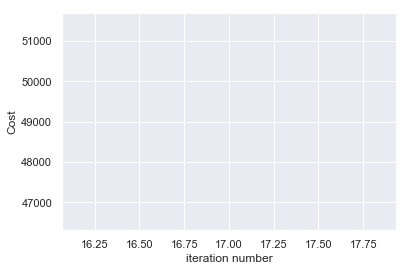

In [27]:
plt.plot(cls.Js)
plt.xlabel('iteration number'); plt.ylabel('Cost'); 

Text(0.5, 1.0, 'Survival Chance')

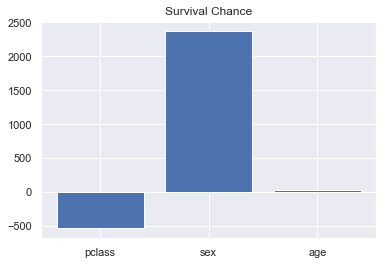

In [28]:
plt.bar(['pclass', 'sex', 'age'], cls.w[0])
plt.title('Survival Chance')

In [29]:
cls.predict(FirstClassGirls.T)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [30]:
cls = Classo(X, y , alpha =  0.1, iteration = 10000)
cls.fit()
y_pred = cls.predict(X_test.T)[0] # Predict on test data

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[161  14]
 [ 70  50]]
Accuracy on Test Data:0.72


In [31]:
cls = Classo(X, y , alpha =  0.01, iteration = 10000)
cls.fit()
y_pred = cls.predict(X_test.T)[0] # Predict on test data

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[151  24]
 [ 37  83]]
Accuracy on Test Data:0.79


In [32]:
import pandas as pd

import requests
import io


url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [33]:
M = data.values
X = M[:,:-1].T
y = M[:,-1].T

In [34]:
X

array([[4.38511018, 4.87239669, 4.83024224, ..., 1.52976627, 1.30197604,
        1.34044951],
       [3.9027371 , 4.12776812, 4.77907697, ..., 2.31600693, 1.41804449,
        1.16548149],
       [3.85438855, 3.80262297, 2.97946713, ..., 4.05952622, 1.52541832,
        3.0439767 ],
       [3.46275234, 3.29671891, 2.29136188, ..., 0.84169662, 2.95788373,
        2.61155526]])